X shape: (23, 36)
X' shape: (23, 36)
Wybrano r = 22
Macierz A (aproksymowana) shape: (23, 23)

Pierwsze 5x5 elementów macierzy A:
[[  0.67249099  -4.39401721   1.7020351   -0.75535575  10.74248165]
 [ -1.97670908   3.30048216  -3.66210631   1.52496      9.93709438]
 [  8.97668372 -18.73486002  -7.5302598   -3.19978578 -20.57221216]
 [  5.97427478  -8.30287246  -3.12205324  -1.69821447  -3.26093331]
 [ -7.89705768  16.36212312   7.84928992  25.85515003  27.3119641 ]]


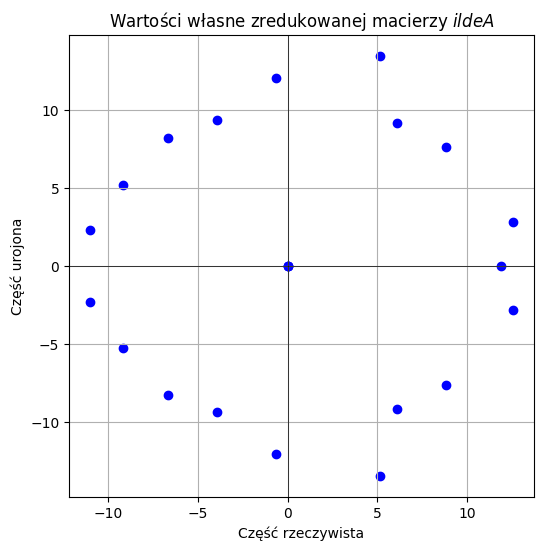


Błąd rekonstrukcji pierwszego kroku: 1.347677


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Wczytanie danych z CSV
X_df = pd.read_csv('War13_X.csv', sep=';', decimal=',', header=None)
Xprime_df = pd.read_csv('War13_Xprime.csv', sep=';', decimal=',', header=None)

# Konwersja na numpy array
X = X_df.values
Xprime = Xprime_df.values

print(f"X shape: {X.shape}")
print(f"X' shape: {Xprime.shape}")

# 2. Definicja funkcji DMD (zmodyfikowana na podstawie kodu z pliku)
def DMD(X, Xprime, r):
    # Krok 1: SVD
    U, Sigma, VT = np.linalg.svd(X, full_matrices=False)
    
    # Wybór r pierwszych komponentów
    Ur = U[:, :r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r, :]
    
    # Krok 2: Zredukowana macierz A_tilde
    Atilde = Ur.T @ Xprime @ VTr.T @ np.linalg.inv(Sigmar)
    
    # Krok 3: Rozkład własny Atilde
    Lambda, W = np.linalg.eig(Atilde)
    
    # Krok 4: Odtworzenie pełnych wektorów własnych Phi
    Phi = Xprime @ VTr.T @ np.linalg.inv(Sigmar) @ W
    
    # Wektor amplitud
    alpha1 = Sigmar @ VTr[:, 0]
    b = np.linalg.solve(W @ np.diag(Lambda), alpha1)
    
    return Atilde, Phi, Lambda, b

# 3. Wybór r (np. r = min(X.shape) lub mniejsza wartość)
r = min(X.shape) - 1
print(f"Wybrano r = {r}")

# 4. Obliczenie DMD
Atilde, Phi, Lambda, b = DMD(X, Xprime, r)

# 5. Obliczenie pełnej macierzy A (aproksymacja)
U, S, VT = np.linalg.svd(X, full_matrices=False)
S_inv = np.diag(1.0 / S[:r])
X_pseudo_inv = VT[:r, :].T @ S_inv @ U[:, :r].T
A_approx = Xprime @ X_pseudo_inv

print(f"Macierz A (aproksymowana) shape: {A_approx.shape}")
print("\nPierwsze 5x5 elementów macierzy A:")
print(A_approx[:5, :5])

# 6. Wizualizacja wartości własnych Lambda
plt.figure(figsize=(6, 6))
plt.scatter(np.real(Lambda), np.imag(Lambda), color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Część rzeczywista')
plt.ylabel('Część urojona')
plt.title('Wartości własne zredukowanej macierzy $\tilde{A}$')
plt.grid(True)
plt.show()

# 7. Rekonstrukcja dla sprawdzenia (pierwszy krok)
x0 = X[:, 0]
x1_reconstructed = A_approx @ x0
x1_true = Xprime[:, 0]

error = np.linalg.norm(x1_reconstructed - x1_true) / np.linalg.norm(x1_true)
print(f"\nBłąd rekonstrukcji pierwszego kroku: {error:.6f}")